# HW Day #9 반도체 정상/불량 분류

- 반도체 제조 공정의 데이터
    - 0은 pass에 해당하고 1은 fail에 해당
    - 데이터 타임 스탬프는 해당 특정 시험 지점을 의미

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 읽기 및 조회
 - uci-secom2.csv 파일을 읽어서 data 변수에 저장

In [43]:
# Code here
data = pd.read_csv('uci-secom2.csv')
data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,0
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,0
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,0
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,0


 - 정보 조회

In [85]:
# Code here
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 592 columns):
 #    Column     Non-Null Count  Dtype  
---   ------     --------------  -----  
 0    Time       1567 non-null   object 
 1    0          1567 non-null   float64
 2    1          1567 non-null   float64
 3    2          1567 non-null   float64
 4    3          1567 non-null   float64
 5    4          1567 non-null   float64
 6    5          1567 non-null   float64
 7    6          1567 non-null   float64
 8    7          1567 non-null   float64
 9    8          1567 non-null   float64
 10   9          1567 non-null   float64
 11   10         1567 non-null   float64
 12   11         1567 non-null   float64
 13   12         1567 non-null   float64
 14   13         1567 non-null   float64
 15   14         1567 non-null   float64
 16   15         1567 non-null   float64
 17   16         1567 non-null   float64
 18   17         1567 non-null   float64
 19   18         1567 non-null 

C:\Users\Admin\AppData\Local\Temp\ipykernel_15952\289904636.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


 - Pass/Fail 열의 클래스 별 빈도수 조회

In [45]:
# Code here
data.iloc[:,-1].value_counts()

0    1463
1     104
Name: Pass/Fail, dtype: int64

 - 통계 요약 조회

In [46]:
# Code here
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,0.066369
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.249005
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,0.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,0.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,0.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


### 결측치 처리

 - 열 별 결측치 조회

In [47]:
# Code here
data.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [48]:
data.loc[:, data.isna().sum() > 0].columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '580', '581', '582', '583', '584', '585', '586', '587', '588', '589'],
      dtype='object', length=538)

In [49]:
data.loc[:,  data.isna().sum() > 0 ].columns.values  #실제로 결측치가 포함된 열 이름

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57',
       '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
       '80', '81', '82', '83', '84', '85', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '99', '100', '101', '102', '103',
       '104', '105', '106', '107', '108', '109', '110', '111', '112',
       '118', '121', '122', '123', '124', '125', '126', '127', '128',
       '129', '130', '131', '132', '133', '134', '135', '136', '137',
       '138', '139', '140', '141', '142', '143', '144', '145', '146',
       '147', '148', '149', '150', '151', '152', '153', '154', 

 - 모든 결측치를 0으로 일괄 치환

In [50]:
# Code here
data = data.fillna(value=0, axis=0) #data.fillna(0)이랑 같은 뜻
data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,0
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,0
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,0
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,0
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


 - 열 별 결측치 수와 전체 결측치 수 조회

In [52]:
# Code here
data.isna().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [53]:
# Code here
data.isna().sum().sum()

0

### 불필요한 열 삭제
 - Time 열 삭제
 - 분산이 0인 열 조회 후 삭제

In [54]:
# Time 열 삭제
data2 = data.drop(['Time'], axis=1)
data2

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,0.0000,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,0


In [55]:
# 분산이 0인 열 조회
data2.loc[:,data2.var()==0].columns

Index(['13', '52', '97', '141', '149', '178', '179', '186', '189', '190',
       ...
       '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'],
      dtype='object', length=112)

In [56]:
# 분산이 0인 열 삭제
data3 = data2.drop(data2.loc[:, data2.var()==0].columns, axis=1)
#data3=data2.drop(columns=data2.loc[:,data2.var()==0].columns)
data3

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,0.0000,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,0


### 데이터 탐색
 - 상관 계수 출력 및 히트맵 시각화

In [57]:
# Code here
data3.corr(numeric_only=True)

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.047782,0.007590,0.009448,-0.000915,0.008706,0.006129,0.010738,-0.050979,0.009959,...,-0.033622,0.010503,0.019840,0.017889,0.019522,0.044745,0.005233,0.003918,0.021489,0.006149
1,-0.047782,1.000000,-0.030448,0.006021,0.002192,-0.030127,-0.031616,-0.025086,0.027609,0.003704,...,0.043107,-0.017392,0.003809,0.004409,0.003821,-0.009219,0.039479,0.040500,0.044464,-0.019672
2,0.007590,-0.030448,1.000000,0.323782,0.020438,0.990089,0.818770,0.747230,0.002600,-0.045731,...,0.038416,-0.010627,-0.004771,-0.003030,-0.004263,0.015733,-0.007090,-0.009122,-0.030434,0.024929
3,0.009448,0.006021,0.323782,1.000000,-0.054015,0.286397,-0.119180,0.279646,-0.108217,0.051567,...,0.000922,0.009788,0.022593,0.022361,0.023288,0.038755,-0.038371,-0.033648,-0.084449,-0.016341
4,-0.000915,0.002192,0.020438,-0.054015,1.000000,0.007041,-0.034736,-0.475861,-0.020082,0.053859,...,0.107783,0.012778,-0.001323,-0.001605,-0.001636,-0.043693,-0.030930,-0.026046,0.050741,-0.013577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.044745,-0.009219,0.015733,0.038755,-0.043693,0.019435,-0.005877,0.051943,0.017642,0.032423,...,-0.206109,-0.008240,0.002391,0.001602,0.002872,1.000000,0.169634,0.165942,-0.484741,0.004448
587,0.005233,0.039479,-0.007090,-0.038371,-0.030930,-0.003077,0.016362,-0.006335,0.027655,0.057856,...,0.227096,0.018981,-0.001809,-0.001696,-0.002122,0.169634,1.000000,0.974332,0.391503,0.035670
588,0.003918,0.040500,-0.009122,-0.033648,-0.026046,-0.004919,0.013832,-0.014288,0.033729,0.059321,...,0.216292,0.019083,-0.001445,-0.001182,-0.001746,0.165942,0.974332,1.000000,0.389898,0.031447
589,0.021489,0.044464,-0.030434,-0.084449,0.050741,-0.026117,0.002246,-0.067263,-0.016895,0.004106,...,0.431632,0.028502,-0.002453,-0.002750,-0.003266,-0.484741,0.391503,0.389898,1.000000,-0.002472


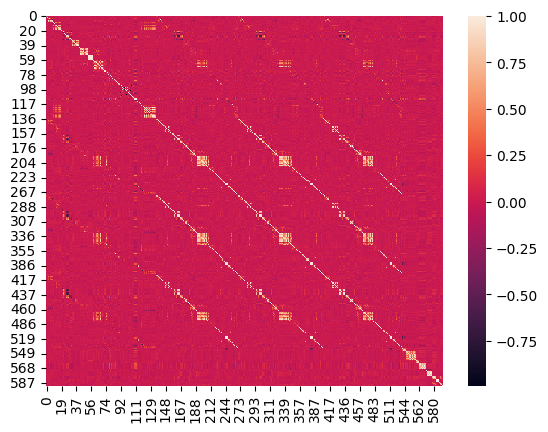

In [59]:
# Code here
sns.heatmap(data3.corr())
plt.show()

### 모델링
 - 데이터 분할
   - x: Pass/Fail 열을 제외한 나머지 열
   - y: Pass/Fail 열

In [60]:
# Code here

x = data3.iloc[:,:-1]
y = data3.iloc[:,-1]

print(x.shape,y.shape)

(1567, 478) (1567,)


 - 데이터 스케일링
   - 표준화 적용

In [61]:
# Code here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_sc = scaler.fit_transform(x)

 - 데이터 분할
   - 8:2 비율
   - 층화 추출
   - random_state=0

In [62]:
# Code here
from sklearn.model_selection import train_test_split

A = train_test_split(x_sc, y, test_size=0.2, stratify=y, random_state=0)
x_train, x_test, y_train, y_test = A

[x.shape for x in [x_train, x_test, y_train, y_test]]

[(1253, 478), (314, 478), (1253,), (314,)]

 - 여러 모델을 이용하여 학습
   - LogisticRegression
   - KNeighborsClassifier
   - DecisionTreeClassifier
   - RandomForestClassifier
   - GradientBoostingClassifier
   - XGBClassifier
   - LGBMClassifier
   - 평가 측도는 accuracy, f1_score, recall, precision, specificity
   - 각 모델별 하이퍼 파라미터는 자율적으로 선택

In [63]:
# 특이도 (specificity) 함수
# 그대로 실행하세요
from sklearn.metrics import confusion_matrix

def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn/(tn+fp)

In [65]:
# Code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

model = LogisticRegression().fit(x_train,y_train)

print('Logistic Regression')
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
funcs = [accuracy_score, f1_score, recall_score, precision_score, specificity]
names = ['accuracy', 'f1', 'recall', 'precision', 'specificity']
for name, score_func in zip(names, funcs):
    print(f'train {name}: {score_func(y_train, y_train_pred):.4f}')
    print(f'test {name}: {score_func(y_test, y_test_pred):.4f}')

Logistic Regression
train accuracy: 0.9888
test accuracy: 0.8854
train f1: 0.9079
test f1: 0.1818
train recall: 0.8313
test recall: 0.1905
train precision: 1.0000
test precision: 0.1739
train specificity: 1.0000
test specificity: 0.9352


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
# 추가적으로 보세요
from sklearn.metrics import classification_report

y_train_pred = model.predict(x_train)
A = classification_report(y_train, y_train_pred, target_names=["Fail", "Pass"])
print(A)

              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00      1170
        Pass       1.00      1.00      1.00        83

    accuracy                           1.00      1253
   macro avg       1.00      1.00      1.00      1253
weighted avg       1.00      1.00      1.00      1253



In [74]:
# Code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)

params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_KNN = GridSearchCV(model, params_KNN, cv=3).fit(x_train, y_train)

model = grid_KNN.best_estimator_

print('KNeighborsClassifier')
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

funcs = [accuracy_score, f1_score, recall_score, precision_score, specificity]
names = ['accuracy', 'f1', 'recall', 'precision', 'specificity']
for name, score_func in zip(names, funcs):
    print(f'train {name}: {score_func(y_train, y_train_pred):.4f}')
    print(f'test {name}: {score_func(y_test, y_test_pred):.4f}')

KNeighborsClassifier
train accuracy: 0.9346
test accuracy: 0.9331
train f1: 0.0238
test f1: 0.0000
train recall: 0.0120
test recall: 0.0000
train precision: 1.0000
test precision: 0.0000
train specificity: 1.0000
test specificity: 1.0000


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# Code here
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', random_state=0).fit(x_train, y_train)

print('Decision Tree')
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
funcs = [accuracy_score, f1_score, recall_score, precision_score, specificity]
names = ['accuracy', 'f1', 'recall', 'precision', 'specificity']
for name, score_func in zip(names, funcs):
    print(f'train {name}: {score_func(y_train, y_train_pred):.4f}')
    print(f'test {name}: {score_func(y_test, y_test_pred):.4f}')

Decision Tree
train accuracy: 1.0000
test accuracy: 0.8694
train f1: 1.0000
test f1: 0.1961
train recall: 1.0000
test recall: 0.2381
train precision: 1.0000
test precision: 0.1667
train specificity: 1.0000
test specificity: 0.9147


In [76]:
# Code here
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_split=2).fit(x_train, y_train)

print('Random Forest')
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
funcs = [accuracy_score, f1_score, recall_score, precision_score, specificity]
names = ['accuracy', 'f1', 'recall', 'precision', 'specificity']
for name, score_func in zip(names, funcs):
    print(f'train {name}: {score_func(y_train, y_train_pred):.4f}')
    print(f'test {name}: {score_func(y_test, y_test_pred):.4f}')

Random Forest
train accuracy: 0.9585
test accuracy: 0.9331
train f1: 0.5439
test f1: 0.0000
train recall: 0.3735
test recall: 0.0000
train precision: 1.0000
test precision: 0.0000
train specificity: 1.0000
test specificity: 1.0000


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
# Code here
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=1, n_estimators=100, max_depth=10).fit(x_train, y_train)

print('Graident Boosting')
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
funcs = [accuracy_score, f1_score, recall_score, precision_score, specificity]
names = ['accuracy', 'f1', 'recall', 'precision', 'specificity']
for name, score_func in zip(names, funcs):
    print(f'train {name}: {score_func(y_train, y_train_pred):.4f}')
    print(f'test {name}: {score_func(y_test, y_test_pred):.4f}')

Graident Boosting
train accuracy: 1.0000
test accuracy: 0.8726
train f1: 1.0000
test f1: 0.1667
train recall: 1.0000
test recall: 0.1905
train precision: 1.0000
test precision: 0.1481
train specificity: 1.0000
test specificity: 0.9215


In [79]:
# Code here
from xgboost import XGBClassifier

model = XGBClassifier().fit(x_train, y_train)

print('XGBClassifier')
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
funcs = [accuracy_score, f1_score, recall_score, precision_score, specificity]
names = ['accuracy', 'f1', 'recall', 'precision', 'specificity']
for name, score_func in zip(names, funcs):
    print(f'train {name}: {score_func(y_train, y_train_pred):.4f}')
    print(f'test {name}: {score_func(y_test, y_test_pred):.4f}')

XGBClassifier
train accuracy: 1.0000
test accuracy: 0.9363
train f1: 1.0000
test f1: 0.0909
train recall: 1.0000
test recall: 0.0476
train precision: 1.0000
test precision: 1.0000
train specificity: 1.0000
test specificity: 1.0000


In [80]:
# Code here
from lightgbm import LGBMClassifier

model = LGBMClassifier().fit(x_train, y_train)

print('Light GBM')
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
funcs = [accuracy_score, f1_score, recall_score, precision_score, specificity]
names = ['accuracy', 'f1', 'recall', 'precision', 'specificity']
for name, score_func in zip(names, funcs):
    print(f'train {name}: {score_func(y_train, y_train_pred):.4f}')
    print(f'test {name}: {score_func(y_test, y_test_pred):.4f}')

Light GBM
train accuracy: 1.0000
test accuracy: 0.9363
train f1: 1.0000
test f1: 0.0909
train recall: 1.0000
test recall: 0.0476
train precision: 1.0000
test precision: 1.0000
train specificity: 1.0000
test specificity: 1.0000
